Add necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Interpolation</h3>
Polynomial Interpolation

In [36]:
class PolynomialInterpolator:
    def __init__(self):
        self.data = []
        self.coefficients = []
    def add_data(self, x, y):
        self.data.append([x,y])
        self.create_function()
    def create_function(self):

        #create the matrix, and y matrix
        mtrx = []
        size = len(self.data)
        y_mtrx = []
        for data in self.data:
            x = data[0]
            y = data[1]
            y_mtrx.append([y])
            row = []
            for i in range(size):
                row.append(x**i)
            mtrx.append(row)
        self.coefficients = np.linalg.solve(mtrx, y_mtrx)
        return
    def evaluate(self, x):
        y = 0
        for i in range(len(self.coefficients)):
            y = y + self.coefficients[i][0] * (x**i)
        return y
    def plot(self):
        x_vals = np.linspace(-5,5,200)
        y_vals = self.evaluate(x_vals)
        plt.plot(x_vals, y_vals)
        for d in self.data:
            x = d[0]
            y = d[1]
            plt.plot(x,y,marker="o")

Testing

In [37]:
interpolator = PolynomialInterpolator()
data = [[-3,3],[2,4],[3,9],[2.5,20]]
for d in data:
    interpolator.add_data(d[0], d[1])
print(interpolator.evaluate(1))
print(interpolator.evaluate(2.5))
print(interpolator.evaluate(3))
print(interpolator.evaluate(3.5))

-79.10909090909057
20.00000000000003
9.0
-36.472727272727184


Plotting the data

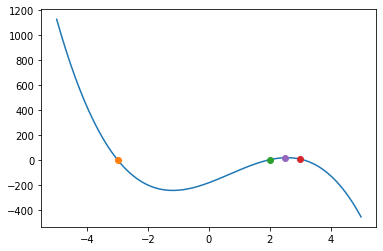

In [38]:
interpolator.plot()

Perturbate data slightly

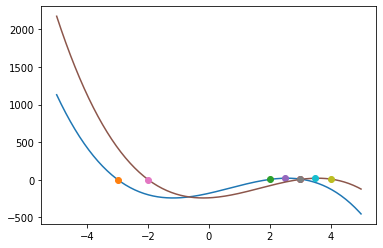

In [43]:
interpolator_perturbated = PolynomialInterpolator()
perturbate_amount = 1
for d in data:
    x = d[0] + perturbate_amount
    y = d[1]
    interpolator_perturbated.add_data(x,y)
interpolator.plot()
interpolator_perturbated.plot()

<h3>Lagrange Interpolation</h3>

In [86]:
class LagrangeInterpolator:
    def __init__(self):
        self.x_values = []
        self.y_values = []
        self.dividers = []
        
    def add_data(self, x, y):
        self.x_values.append(x)
        self.y_values.append(y)

        is_first = len(self.x_values) == 1
        if is_first:
            self.create_dividers()
        else:
            self.adjust_dividers(x)

    def create_dividers(self):
        self.dividers = []
        data_length = len(self.x_values)
        for i in range(data_length):
            divider = 1
            for j in range(data_length):
                if j == i:
                    continue
                divider = divider * (self.x_values[i] - self.x_values[j])
            self.dividers.append(divider)

    def adjust_dividers(self, lastx):
        data_length = len(self.x_values)
        for i in range(data_length - 1):
            self.dividers[i] *= (self.x_values[i] - lastx)
            
        current_divider = 1
        for i in range(data_length - 1):
            current_divider = current_divider * (lastx - self.x_values[i])
        self.dividers.append(current_divider)

    def evaluate(self, x):
        if x in self.x_values:
            has_index = self.x_values.index(x)
            return self.y_values[has_index]
        total_mult = 1
        for other_x in self.x_values:
            total_mult = total_mult * (x - other_x)
        y = 0
        for i in range(len(self.dividers)):
            y += (total_mult / (x - self.x_values[i]) / self.dividers[i] * self.y_values[i])
        return y

    def plot(self):
        x_vals = np.linspace(-5,5,200)
        y_vals = []
        x_len = len(self.x_values)
        for x in x_vals:
            y_vals.append(self.evaluate(x))
        plt.plot(x_vals, y_vals)
        for i in range(x_len):
            x = self.x_values[i]
            y = self.y_values[i]
            plt.plot(x,y,marker="o")

Add same data to this interpolator

In [87]:
lagrange_interpolator = LagrangeInterpolator()

data_lag = [[-3,3],[2,4],[3,9],[2.5,20]]
for d in data_lag:
    lagrange_interpolator.add_data(d[0], d[1])
print(interpolator.evaluate(1))
print(interpolator.evaluate(2.5))
print(interpolator.evaluate(3))
print(interpolator.evaluate(3.5))

-79.10909090909057
20.00000000000003
9.0
-36.472727272727184


Plot

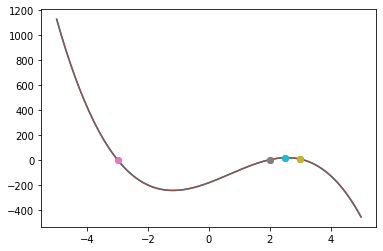

In [90]:
lagrange_interpolator.plot()
interpolator.plot()
plt.show()